In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stats = pd.read_csv('datasets/allstats.csv')

In [5]:
stats.shape

(84454, 36)

In [6]:
stats.head()

,Unnamed: 0,Player,Pos,Age,Rk,Date,Tm,Opp,Result,G#,...,ReceivingYds,Y/R,ReceivingTD,Ctch%,Y/Tgt,RushingAtt,RushingYds,Y/A,RushingTD,FantasyPoints
0,0,Mike Tomczak,QB,36.324,1,1999-09-12,PIT,CLE,W 43-0,1,...,0,0.0,0,0,0.0,0,0,0.0,0,11.12
1,1,Tom Tupa,QB/P,33.218,2,1999-09-12,NYJ,NWE,L 28-30,1,...,0,0.0,0,0,0.0,0,0,0.0,0,14.60
2,2,Dan Marino*,QB,37.363,3,1999-09-13,MIA,DEN,W 38-21,1,...,0,0.0,0,0,0.0,0,0,0.0,0,16.60
3,3,Brad Johnson,QB,30.364,4,1999-09-12,WAS,DAL,L 35-41,1,...,0,0.0,0,0,0.0,0,0,0.0,0,23.28
4,4,Steve McNair,QB,26.210,5,1999-09-12,TEN,CIN,W 36-35,1,...,0,0.0,0,0,0.0,0,0,0.0,0,23.64


In [7]:
stats.dtypes

Unnamed: 0         int64
Player            object
Pos               object
Age              float64
Rk                 int64
Date              object
Tm                object
Opp               object
Result            object
G#                 int64
Week               int64
Day               object
Cmp                int64
PassingAtt         int64
Cmp%             float64
PassingYds         int64
PassingTD          int64
Int                int64
Rate             float64
Sk                 int64
Yds.1              int64
Y/PassingAtt     float64
AY/A             float64
Home T/F          object
Tgt                int64
Rec                int64
ReceivingYds       int64
Y/R              float64
ReceivingTD        int64
Ctch%             object
Y/Tgt            float64
RushingAtt         int64
RushingYds         int64
Y/A              float64
RushingTD          int64
FantasyPoints    float64
dtype: object

In [8]:
stats.isnull().any()

Unnamed: 0       False
Player           False
Pos               True
Age              False
Rk               False
Date             False
Tm               False
Opp              False
Result           False
G#               False
Week             False
Day              False
Cmp              False
PassingAtt       False
Cmp%             False
PassingYds       False
PassingTD        False
Int              False
Rate             False
Sk               False
Yds.1            False
Y/PassingAtt     False
AY/A             False
Home T/F         False
Tgt              False
Rec              False
ReceivingYds     False
Y/R              False
ReceivingTD      False
Ctch%            False
Y/Tgt            False
RushingAtt       False
RushingYds       False
Y/A              False
RushingTD        False
FantasyPoints    False
dtype: bool

In [9]:
stats.fillna('N/A',inplace = True)

In [10]:
stats.isnull().any()

Unnamed: 0       False
Player           False
Pos              False
Age              False
Rk               False
Date             False
Tm               False
Opp              False
Result           False
G#               False
Week             False
Day              False
Cmp              False
PassingAtt       False
Cmp%             False
PassingYds       False
PassingTD        False
Int              False
Rate             False
Sk               False
Yds.1            False
Y/PassingAtt     False
AY/A             False
Home T/F         False
Tgt              False
Rec              False
ReceivingYds     False
Y/R              False
ReceivingTD      False
Ctch%            False
Y/Tgt            False
RushingAtt       False
RushingYds       False
Y/A              False
RushingTD        False
FantasyPoints    False
dtype: bool

In [11]:
stats['Date'] = stats['Date'].astype(str)
stats['Date'] = pd.to_datetime(stats['Date'], yearfirst = True)

In [12]:
stats.dtypes

Unnamed: 0                int64
Player                   object
Pos                      object
Age                     float64
Rk                        int64
Date             datetime64[ns]
Tm                       object
Opp                      object
Result                   object
G#                        int64
Week                      int64
Day                      object
Cmp                       int64
PassingAtt                int64
Cmp%                    float64
PassingYds                int64
PassingTD                 int64
Int                       int64
Rate                    float64
Sk                        int64
Yds.1                     int64
Y/PassingAtt            float64
AY/A                    float64
Home T/F                 object
Tgt                       int64
Rec                       int64
ReceivingYds              int64
Y/R                     float64
ReceivingTD               int64
Ctch%                    object
Y/Tgt                   float64
RushingA

In [13]:
qb = stats[['Pos', 'Tm', 'PassingAtt', 'Date']]

In [14]:
qb.head()

,Pos,Tm,PassingAtt,Date
0,QB,PIT,8,1999-09-12
1,QB/P,NYJ,10,1999-09-12
2,QB,MIA,23,1999-09-13
3,QB,WAS,33,1999-09-12
4,QB,TEN,32,1999-09-12


In [15]:
qb['Pos'].value_counts()

RB       25718
WR       25620
QB       20045
TE        7266
FB        2892
         ...  
DB/LB        1
HB/F         1
TE-L         1
24           1
FB/RB        1
Name: Pos, Length: 89, dtype: int64

In [16]:
qbmask = qb['Pos'].str.contains('QB')

In [17]:
qb = qb[qbmask]

In [18]:
qb.head()

,Pos,Tm,PassingAtt,Date
0,QB,PIT,8,1999-09-12
1,QB/P,NYJ,10,1999-09-12
2,QB,MIA,23,1999-09-13
3,QB,WAS,33,1999-09-12
4,QB,TEN,32,1999-09-12


In [19]:
qb.dtypes

Pos                   object
Tm                    object
PassingAtt             int64
Date          datetime64[ns]
dtype: object

In [20]:
import datetime

In [21]:
#df['year'] = pd.DatetimeIndex(df['birth_date']).year
qb['Year'] = pd.DatetimeIndex(qb['Date']).year
qb['Month'] = pd.DatetimeIndex(qb['Date']).month
qb['Day'] = pd.DatetimeIndex(qb['Date']).day

In [22]:
qb.head()

,Pos,Tm,PassingAtt,Date,Year,Month,Day
0,QB,PIT,8,1999-09-12,1999,9,12
1,QB/P,NYJ,10,1999-09-12,1999,9,12
2,QB,MIA,23,1999-09-13,1999,9,13
3,QB,WAS,33,1999-09-12,1999,9,12
4,QB,TEN,32,1999-09-12,1999,9,12


In [23]:
qbgrouped = qb.groupby(['Year', 'Tm']).sum()

In [24]:
qbgrouped.head()

PassingAtt  Month  Day
Year Tm                         
1999 ARI         499    347  541
     ATL         472    356  591
     BAL         506    360  571
     BUF         481    330  590
     CAR         534    330  544

In [25]:
qbgrouped.drop(['Month', 'Day'], axis = 1, inplace = True)

In [26]:
qbgrouped.head()

PassingAtt
Year Tm             
1999 ARI         499
     ATL         472
     BAL         506
     BUF         481
     CAR         534

In [27]:
qbgrouped.reset_index(inplace = True)

In [28]:
qbgrouped.head()

,Year,Tm,PassingAtt
0,1999,ARI,499
1,1999,ATL,472
2,1999,BAL,506
3,1999,BUF,481
4,1999,CAR,534


In [29]:
passmask = qbgrouped['PassingAtt'] > 100

In [30]:
qbgrouped = qbgrouped[passmask]

In [31]:
qbavg = qb.groupby(['Year']).sum()

In [32]:
qbavg['PassingAtt'] = qbavg['PassingAtt']/32

In [33]:
qbavg.head()

,PassingAtt,Month,Day
Year,,,
1999,488.65625,10438,16732
2000,543.53125,10991,15423
2001,474.53125,9721,15020
2002,568.28125,10302,16026
2003,513.68750,9950,15856


In [34]:
qbavg.reset_index(inplace = True)

In [35]:
qbavg.head()

,Year,PassingAtt,Month,Day
0,1999,488.65625,10438,16732
1,2000,543.53125,10991,15423
2,2001,474.53125,9721,15020
3,2002,568.28125,10302,16026
4,2003,513.68750,9950,15856


No handles with labels found to put in legend.


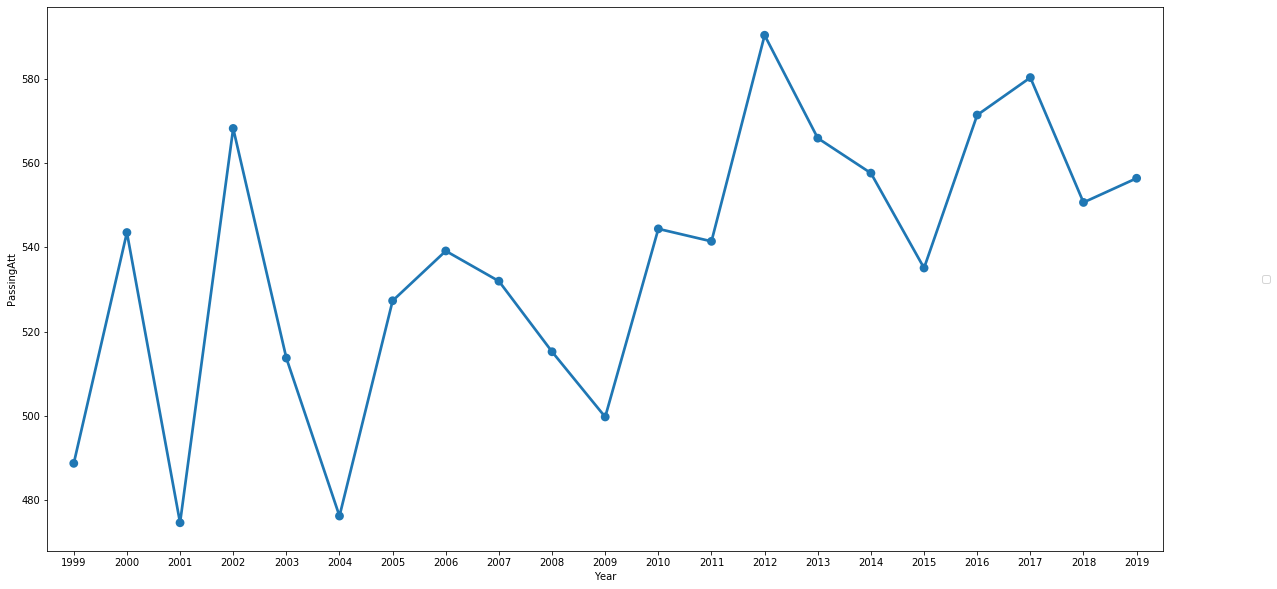

In [37]:
plt.figure(figsize = (20,10))
#g = sns.pointplot(x = 'Year', y = 'PassingAtt', data = qbgrouped, hue = 'Tm')
avg = sns.pointplot(x = 'Year', y = 'PassingAtt', data = qbavg)
avg.legend(loc='right', bbox_to_anchor=(1.1, 0.5), ncol=1)


In [38]:
total = stats[['Pos', 'Tm', 'PassingAtt', 'RushingAtt','Date']]

In [39]:
pos = total['Pos'].value_counts()

In [40]:
qbmask = total['Pos'].str.contains('QB')
rbmask = total['Pos'].str.contains('RB')

In [41]:
total[rbmask]

,Pos,Tm,PassingAtt,RushingAtt,Date
73,RB,CHI,0,0,1999-09-12
74,RB,PIT,0,0,1999-09-12
96,RB,OAK,0,0,1999-09-12
97,RB,ARI,0,0,1999-09-12
101,RB,GNB,0,0,1999-09-12
...,...,...,...,...,...
84437,RB,GNB,0,2,2019-12-29
84439,RB,CHI,0,2,2019-12-29
84441,RB,TEN,0,1,2019-12-29
84451,RB,HOU,0,3,2019-12-29


In [42]:
total['Year'] = pd.DatetimeIndex(total['Date']).year
total['Month'] = pd.DatetimeIndex(total['Date']).month
total['Day'] = pd.DatetimeIndex(total['Date']).day

C:\Users\cjohn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cjohn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cjohn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [43]:
total.head()

,Pos,Tm,PassingAtt,RushingAtt,Date,Year,Month,Day
0,QB,PIT,8,0,1999-09-12,1999,9,12
1,QB/P,NYJ,10,0,1999-09-12,1999,9,12
2,QB,MIA,23,0,1999-09-13,1999,9,13
3,QB,WAS,33,0,1999-09-12,1999,9,12
4,QB,TEN,32,0,1999-09-12,1999,9,12


In [44]:
total = total.groupby(['Year']).sum()

In [45]:
total.head()

,PassingAtt,RushingAtt,Month,Day
Year,,,,
1999,15659,12426,40190,64661
2000,17423,14079,42459,59124
2001,15224,12417,40281,63356
2002,18249,14329,43056,66544
2003,16493,13900,42820,67298


In [46]:
total['RushingAtt'] = total['RushingAtt']/32
total['PassingAtt'] = total['PassingAtt']/32

In [47]:
total.reset_index(inplace = True)

Text(0.5, 1.0, 'Average Pass Attempts per Season vs Average Rush Attempts per Season')

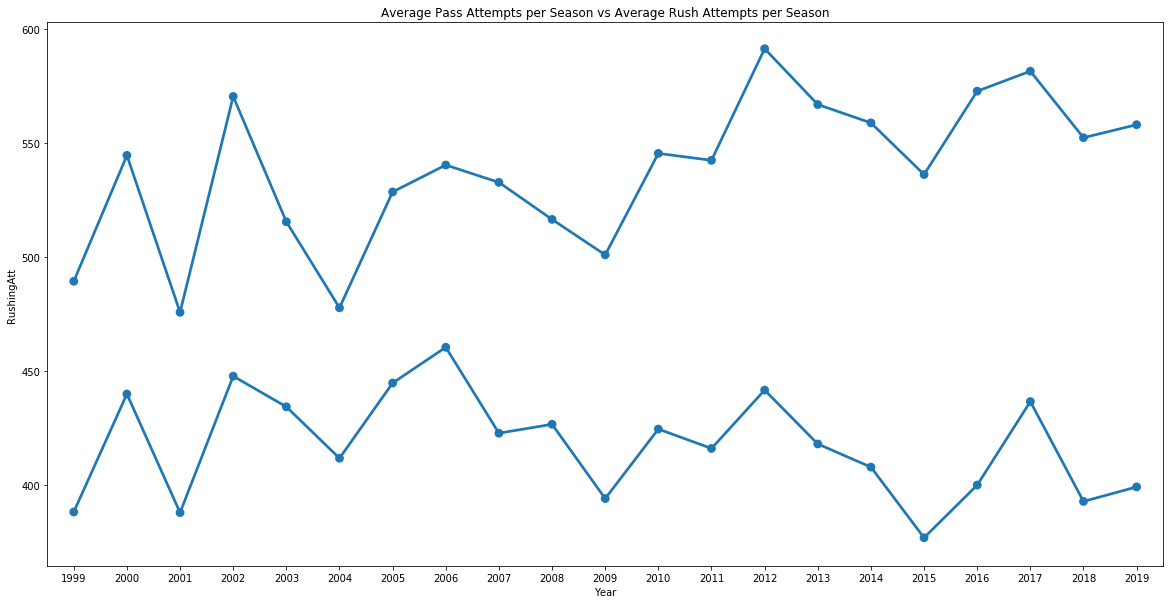

In [49]:
plt.figure(figsize = (20,10))
#g = sns.pointplot(x = 'Year', y = 'PassingAtt', data = qbgrouped, hue = 'Tm')
avg = sns.pointplot(x = 'Year', y = 'PassingAtt', data = total)
avg = sns.pointplot(x = 'Year', y = 'RushingAtt', data = total)
plt.title('Average Pass Attempts per Season vs Average Rush Attempts per Season')

In [50]:
qbgrouped.head()

,Year,Tm,PassingAtt
0,1999,ARI,499
1,1999,ATL,472
2,1999,BAL,506
3,1999,BUF,481
4,1999,CAR,534


In [ ]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker = '.', alpha =0.5, linestyle = 'None', figsize = (11,9), subplots = True)
for ax in axes:
    ax.set_ylabel('Daily Totals(GWh)')

In [ ]:
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Solar'], marker = '.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'], marker ='o', linestyle='-', label= 'Weekly Mean Resample')
ax.set_ylabel('Solar Production(GWh)')
ax.legend();

In [145]:
qbtable = pd.pivot_table(qbgrouped, values = 'PassingAtt', index = 'Year', columns = 'Tm')
qbtable

Tm,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,OAK,PHI,PIT,SDG,SEA,SFO,STL,TAM,TEN,WAS
Year,,,,,,,,,,,,,,,,,,,,,
1999,499.0,472.0,506.0,481.0,534.0,642.0,524.0,490.0,474.0,507.0,...,473.0,440.0,495.0,556.0,480.0,525.0,489.0,421.0,503.0,516.0
2000,611.0,551.0,543.0,577.0,606.0,583.0,477.0,480.0,477.0,615.0,...,522.0,602.0,476.0,603.0,551.0,616.0,627.0,455.0,483.0,581.0
2001,500.0,453.0,529.0,516.0,542.0,496.0,554.0,440.0,385.0,479.0,...,515.0,493.0,427.0,548.0,422.0,483.0,519.0,558.0,478.0,405.0
2002,573.0,508.0,504.0,652.0,492.0,563.0,638.0,575.0,497.0,585.0,...,656.0,571.0,567.0,537.0,625.0,594.0,664.0,598.0,529.0,582.0
2003,533.0,457.0,415.0,501.0,459.0,515.0,520.0,505.0,507.0,477.0,...,520.0,483.0,527.0,523.0,521.0,510.0,597.0,592.0,496.0,523.0
2004,496.0,362.0,437.0,428.0,484.0,441.0,509.0,408.0,483.0,491.0,...,542.0,492.0,331.0,416.0,505.0,532.0,538.0,480.0,551.0,483.0
2005,663.0,443.0,550.0,451.0,473.0,423.0,533.0,489.0,490.0,528.0,...,630.0,632.0,384.0,594.0,519.0,387.0,638.0,494.0,585.0,480.0
2006,587.0,452.0,559.0,466.0,563.0,534.0,555.0,548.0,545.0,454.0,...,481.0,584.0,538.0,462.0,537.0,471.0,623.0,560.0,486.0,492.0
2007,590.0,555.0,556.0,444.0,505.0,567.0,575.0,545.0,531.0,515.0,...,450.0,576.0,440.0,470.0,590.0,513.0,573.0,490.0,464.0,522.0


In [161]:
rows = list(range(6,42,6))
rows

[6, 12, 18, 24, 30, 36]

In [152]:
qbtable[qbtable.columns[:8]]

Tm,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE
Year,,,,,,,,
1999,499.0,472.0,506.0,481.0,534.0,642.0,524.0,490.0
2000,611.0,551.0,543.0,577.0,606.0,583.0,477.0,480.0
2001,500.0,453.0,529.0,516.0,542.0,496.0,554.0,440.0
2002,573.0,508.0,504.0,652.0,492.0,563.0,638.0,575.0
2003,533.0,457.0,415.0,501.0,459.0,515.0,520.0,505.0
2004,496.0,362.0,437.0,428.0,484.0,441.0,509.0,408.0
2005,663.0,443.0,550.0,451.0,473.0,423.0,533.0,489.0
2006,587.0,452.0,559.0,466.0,563.0,534.0,555.0,548.0
2007,590.0,555.0,556.0,444.0,505.0,567.0,575.0,545.0


In [143]:
years = list(range(1999,2020))

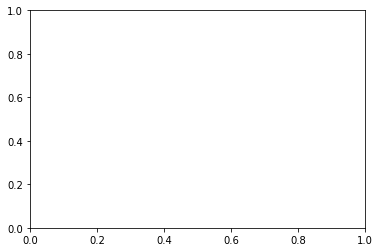

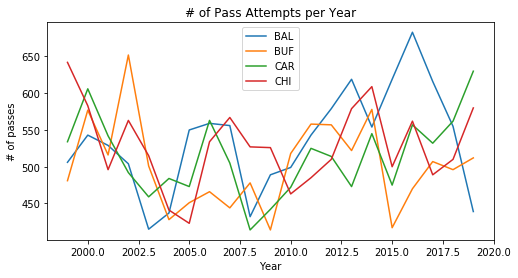

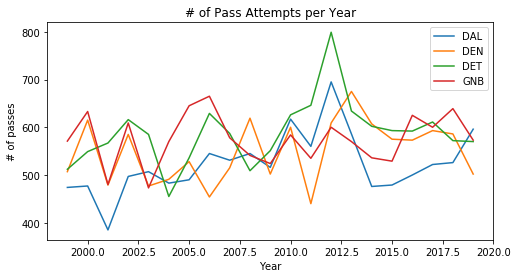

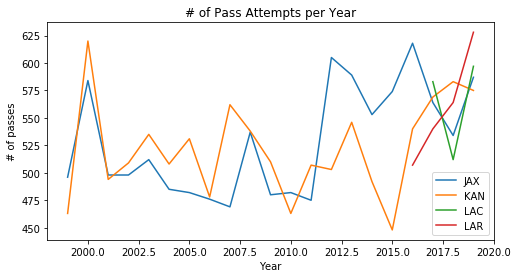

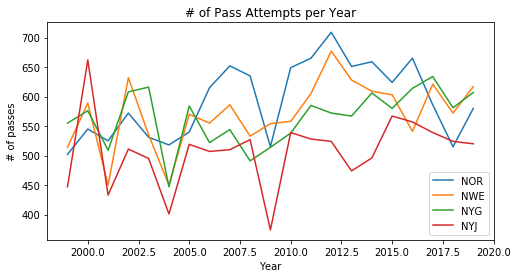

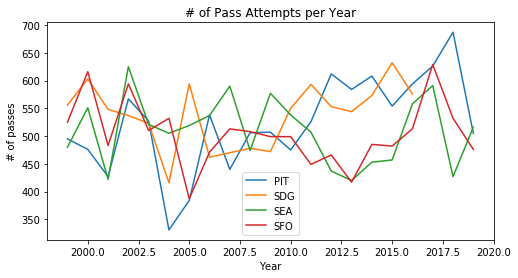

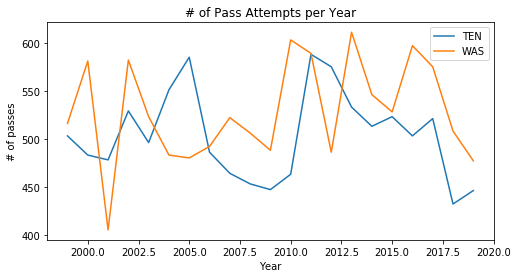

In [163]:
fig,ax = plt.subplots()
for i in rows:
    plt.figure(figsize = (8,4))
    plt.plot(years, qbtable[qbtable.columns[i-4:i]])
    plt.legend(qbtable.columns[i-4:i])
    plt.xlabel('Year')
    plt.ylabel('# of passes')
    plt.title('# of Pass Attempts per Year')
    plt.show()